In [13]:
try:
    !mkdir results
except:
    pass

In [54]:
import fileinput
import glob



cat_list = ['tmp0','tmp1']

first = True
for cat in cat_list:
    file_list = []

    for file in glob.glob(cat+"/*.txt"):
        file_list.append(file)
        print(file)

    with open("results/"+cat+".txt", "wt", encoding="utf-8") as out, fileinput.input(
        files=file_list) as f:
        for line in f:
            if "next" in line:
                if not first:
                    line = line.replace("next", "")
                else:
                    first = False
            out.write(line)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
df = pd.DataFrame (columns = ['Кол-во деталей','Number of curves','Вытягивание','Фаски','Диаметр','Эскизы',
                             'Вращение','Скругление ребра','Радиус', 'Шаг', 'Угол', 'Общ знач вытягиваний', 'Оценка']) 

In [3]:
os.chdir("C:/Users/Admin/Desktop/results")

class GetDF (object):
    @staticmethod
    def getdf(df):
       


        with open("tmp1.txt", "r", encoding="utf-8") as file:
            startPoint = False
            endPoint = False
            obj = 0
            k=0 #кол-во вытягиваний 
            c=0 #кол-во кривых
            f=0 #фаски
            d=0 #диаметры
            s=0 #эскзы
            v=0 #кол-во вращений
            r=0 #скругления
            a=0 #радиусы
            sh=0 #шаг резьбы
            l=0 #Общая длина линий
            ang=0 #Угол
            fa=0 #Начальный угол
            la=0 #Конечный угол
            fk=0 #Начало вытягивания
            lk=0 #Конец вытягивания
            lengk=0 #Длина вытягивания
            det=0 #Кол-во деталей
            mark=0 #Оценка

            for i, line in enumerate(file):
               # if ("Информация об объекте" in line):
                #    obj+=1
               #     df.loc[obj,'ObjNo'] = obj

               # if ("Информация об объекте" in line):
                 #   df.loc[obj,'Name'] = line[+32:+52].strip()

                if ("Количество кривых" in line):
                    line = line[-3:-1].strip()
                    c+=int(line)
                    df.loc[obj,'Number of curves']=c

                if("Информация об объекте" in line):
                    if ("Вытягивание" in line):
                        k+=1
                    df.loc[obj,'Вытягивание']=k

                if ("Смещение фаски" in line):
                    line= line[+16:+17].strip() 
                    f+=float(line)
                    df.loc[obj,'Фаски']=f 

                if ("Размер диаметра для Arc" in line):
                    line= line[+4:+7].strip()
                    d+=float(line)
                    df.loc[obj,'Диаметр']=d 

                if ("Размер радиуса для Arc" in line):
                    line= line[+4:+7].strip()
                    a+=float(line)
                    df.loc[obj,'Радиус']=a

                if("Информация об объекте" in line):
                    if ("SKETCH" in line):
                        s+=1
                    df.loc[obj,'Эскизы']=s

                if("Информация об объекте" in line):
                    if ("Вращение" in line):
                        v+=1
                    df.loc[obj,'Вращение']=v


                if ("Скругление ребра" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        r+=float(line)
                        df.loc[obj,'Скругление ребра']=r

                if ("Шаг" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        sh+= float(line)
                        df.loc[obj,'Шаг']=sh

                if ("Угловой размер" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        ang+= float(line)
                        df.loc[obj,'Угол']=ang

                if ("Тэта" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        ang+= float(line)
                        df.loc[obj,'Угол']=ang

                if ("Начальный угол" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        fa+= float(line)
                if ("Конечный угол" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        la+= float(line)
                        ang+= abs(la-fa)
                        df.loc[obj,'Угол']=ang
                        fa=0
                        la=0

                if ("Начальный предел" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        fk+= float(line)
                if ("Конечный предел" in line):
                    if("="in line):
                        line= line[+4:+7].strip() 
                        lk+= float(line)
                        lengk+= abs(lk-fk)
                        df.loc[obj,'Общ знач вытягиваний']=lengk
                        fk=0
                        lk=0

                if("Имя" in line):
                    if ("SKETCH_000" in line):
                        det+=1
                        df.loc[obj,'Кол-во деталей']=det
                
                if ("Оценка" in line):
                    if ("1" in line):
                        mark=1
                        df.loc[obj,'Оценка']=mark
                    else:
                        mark=0
                        df.loc[obj,'Оценка']=mark

        #print(line, end="")
        return df.fillna(0)


In [4]:
result_df = pd.DataFrame (columns = ['Кол-во деталей','Number of curves','Вытягивание','Фаски','Диаметр','Эскизы',
                             'Вращение','Скругление ребра','Радиус', 'Шаг', 'Угол', 'Общ знач вытягиваний', 'Оценка']) 

In [5]:
for root, dirs, files in os.walk("C:/Users/Admin/Desktop/Students/"):
    for file in files:
        if (file == "tmp1.txt"):
            rp = os.path.join(root)
            os.chdir(rp)
                      
            f = GetDF()
            f.getdf(df)
            result_df = pd.concat([result_df, df])
                     

In [6]:
result_df.astype(float)

,Кол-во деталей,Number of curves,Вытягивание,Фаски,Диаметр,Эскизы,Вращение,Скругление ребра,Радиус,Шаг,Угол,Общ знач вытягиваний,Оценка
0,14.0,169.0,37.0,20.0,1244.0,47.0,2.0,7.0,5.0,115.0,1285.0,1748.0,0.0
0,9.0,154.0,45.0,66.0,393.0,71.0,8.0,64.3,5.0,23.0,2812.0,764.0,0.0
0,11.0,195.0,36.0,38.0,1230.5,46.0,0.0,5.0,5.0,15.8,975.0,2094.3,0.0
0,18.0,356.0,55.0,46.0,1106.1,69.0,9.0,15.0,176.0,32.4,4920.0,1455.0,1.0
0,15.0,191.0,51.0,14.0,3693.9,65.0,4.0,6.2,572.1,16.6,2045.2,2183.9,0.0
0,21.0,174.0,37.0,58.0,1552.4,50.0,5.0,4.5,114.1,251.7,3622.0,2091.5,1.0
0,13.0,135.0,54.0,34.0,1036.1,64.0,4.0,55.5,114.1,13.7,1440.0,2499.5,1.0
0,21.0,328.0,16.0,12.0,170.1,49.0,15.0,55.5,31.7,10.1,8531.0,73.3,1.0
0,25.0,376.0,89.0,13.0,546.5,144.0,18.0,64.6,7.0,216.4,7455.0,1368.0,1.0
0,14.0,296.0,32.0,4.0,258.9,47.0,10.0,1.0,43.8,13.7,4260.0,341.5,1.0


In [7]:
 result_df.astype(float).describe()

,Кол-во деталей,Number of curves,Вытягивание,Фаски,Диаметр,Эскизы,Вращение,Скругление ребра,Радиус,Шаг,Угол,Общ знач вытягиваний,Оценка
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,18.269231,295.807692,49.846154,31.153846,1587.546154,70.500000,10.461538,37.823077,128.550000,87.253846,5076.711538,1450.503846,0.461538
std,4.754431,116.721556,20.226107,26.524995,2097.978382,26.683703,5.608784,33.746873,130.119875,101.317170,2522.846799,981.626598,0.508391
min,9.000000,135.000000,16.000000,0.000000,117.100000,42.000000,0.000000,1.000000,5.000000,4.200000,975.000000,73.300000,0.000000
25%,15.000000,188.750000,37.000000,12.000000,565.775000,52.500000,5.000000,8.150000,34.500000,15.900000,3014.500000,681.500000,0.000000
50%,18.000000,313.000000,48.000000,28.000000,1054.050000,62.000000,11.500000,26.600000,87.500000,23.850000,5447.500000,1411.500000,0.000000
75%,21.750000,362.750000,58.750000,43.000000,1475.300000,73.250000,14.750000,61.350000,174.925000,135.050000,6881.250000,2065.625000,1.000000
max,26.000000,614.000000,92.000000,119.000000,10224.500000,144.000000,20.000000,116.000000,572.100000,322.300000,9765.000000,3671.100000,1.000000


In [8]:
categorical_columns = [c for c in result_df.astype(float).columns if result_df.astype(float)[c].dtype.name == 'object']
numerical_columns   = [c for c in result_df.astype(float).columns if result_df.astype(float)[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

[]
['Кол-во деталей', 'Number of curves', 'Вытягивание', 'Фаски', 'Диаметр', 'Эскизы', 'Вращение', 'Скругление ребра', 'Радиус', 'Шаг', 'Угол', 'Общ знач вытягиваний', 'Оценка']


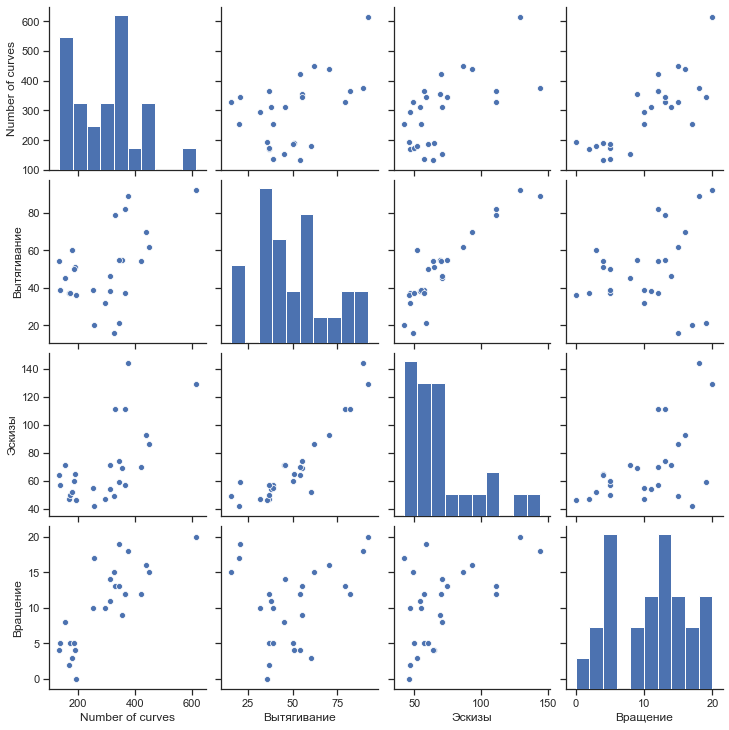

In [9]:
import seaborn as sns

cols = ['Number of curves', 'Вытягивание', 'Эскизы', 'Вращение']
sns.set(style="ticks", color_codes=True)
sns_plot = sns.pairplot(result_df.astype(float)[cols])

In [10]:
result_df.astype(float).corr()

,Кол-во деталей,Number of curves,Вытягивание,Фаски,Диаметр,Эскизы,Вращение,Скругление ребра,Радиус,Шаг,Угол,Общ знач вытягиваний,Оценка
Кол-во деталей,1.000000,0.730260,0.327807,-0.039355,0.392877,0.495484,0.784156,0.158816,0.170686,0.627182,0.773828,0.261579,0.045827
Number of curves,0.730260,1.000000,0.484547,0.242927,0.336756,0.623259,0.808675,0.123525,0.187284,0.412712,0.784172,0.174462,0.157942
Вытягивание,0.327807,0.484547,1.000000,0.301483,0.332628,0.901748,0.233365,0.443548,0.082129,0.377613,0.139808,0.402463,0.116102
Фаски,-0.039355,0.242927,0.301483,1.000000,0.184635,0.290766,0.057579,0.171693,-0.005532,0.177902,0.140085,0.456544,0.083511
Диаметр,0.392877,0.336756,0.332628,0.184635,1.000000,0.266951,0.136358,0.329907,0.396238,0.451573,0.159532,0.605492,0.017973
Эскизы,0.495484,0.623259,0.901748,0.290766,0.266951,1.000000,0.535336,0.337767,-0.011090,0.445432,0.440071,0.274805,0.073715
Вращение,0.784156,0.808675,0.233365,0.057579,0.136358,0.535336,1.000000,0.103302,0.052611,0.413183,0.957173,-0.070684,0.020502
Скругление ребра,0.158816,0.123525,0.443548,0.171693,0.329907,0.337767,0.103302,1.000000,-0.194512,0.166128,0.101075,0.214208,0.171183
Радиус,0.170686,0.187284,0.082129,-0.005532,0.396238,-0.011090,0.052611,-0.194512,1.000000,0.071807,0.063858,0.310605,0.050550
Шаг,0.627182,0.412712,0.377613,0.177902,0.451573,0.445432,0.413183,0.166128,0.071807,1.000000,0.374285,0.244583,0.030328


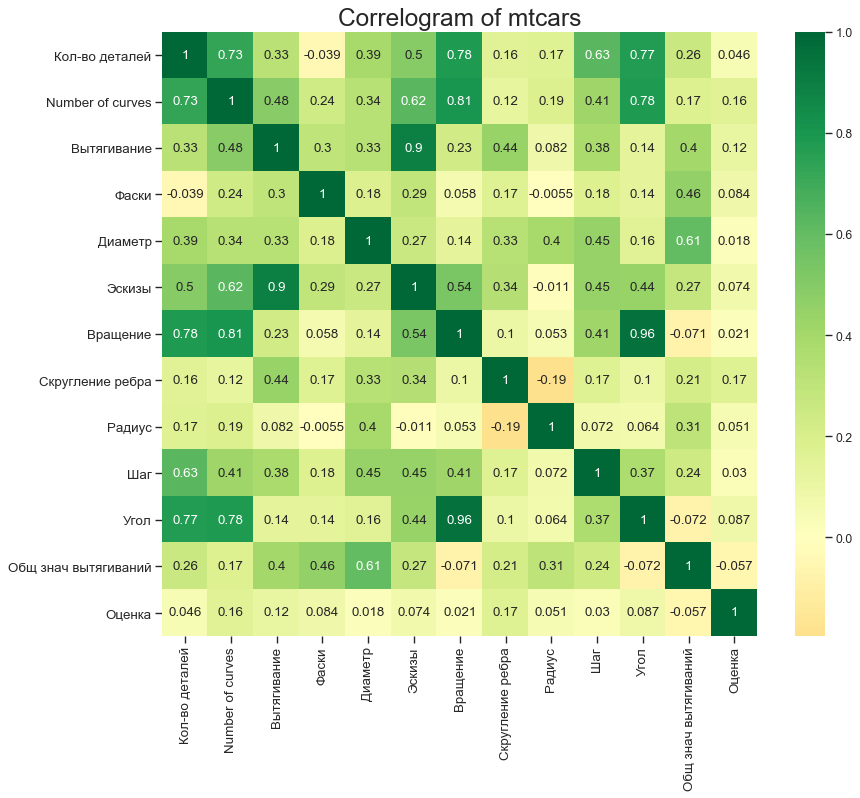

In [11]:
plt.figure(figsize=(12,10), dpi = 80)
sns.heatmap(result_df.astype(float).corr(), 
            xticklabels=result_df.astype(float).corr().columns,
            yticklabels=result_df.astype(float).corr().columns,
            cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

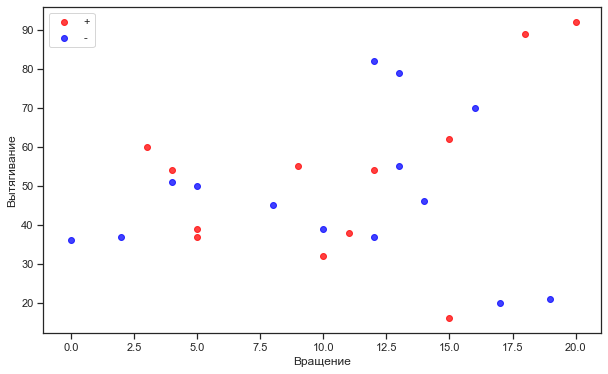

In [12]:
col1 = 'Вращение'
col2 = 'Вытягивание'

plt.figure(figsize=(10, 6))

plt.scatter(result_df.astype(float)[col1][result_df.astype(float)['Оценка'] == 1],
            result_df.astype(float)[col2][result_df.astype(float)['Оценка'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(result_df.astype(float)[col1][result_df.astype(float)['Оценка'] == 0],
            result_df.astype(float)[col2][result_df.astype(float)['Оценка'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

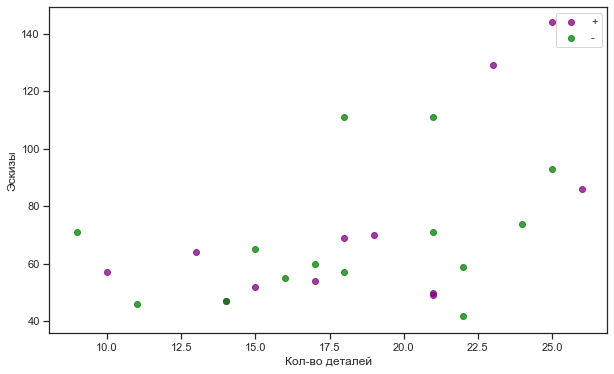

In [45]:
col3 = 'Кол-во деталей'
col4 = 'Эскизы'

plt.figure(figsize=(10, 6))


plt.scatter(result_df.astype(float)[col3][result_df.astype(float)['Оценка'] == 1],
            result_df.astype(float)[col4][result_df.astype(float)['Оценка'] == 1],
            alpha=0.75,
            color='purple',
            label='+')

plt.scatter(result_df.astype(float)[col3][result_df.astype(float)['Оценка'] == 0],
            result_df.astype(float)[col4][result_df.astype(float)['Оценка'] == 0],
            alpha=0.75,
            color='green',
            label='-')



plt.rcParams['figure.facecolor'] = 'white'
ax = plt.gca()
ax.set_facecolor('white')
plt.xlabel(col3)
plt.ylabel(col4)
plt.legend(loc='best');

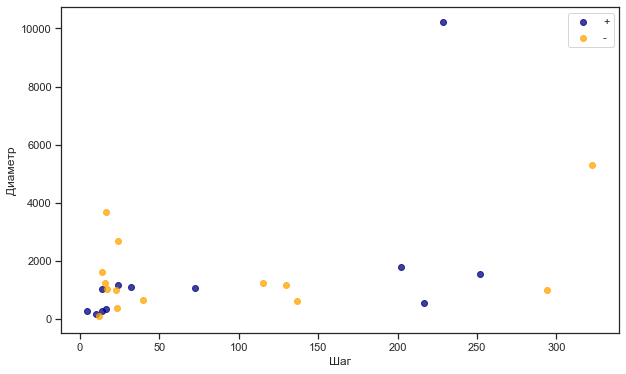

In [51]:
col5 = 'Шаг'
col6 = 'Диаметр'

plt.figure(figsize=(10, 6))


plt.scatter(result_df.astype(float)[col5][result_df.astype(float)['Оценка'] == 1],
            result_df.astype(float)[col6][result_df.astype(float)['Оценка'] == 1],
            alpha=0.75,
            color='navy',
            label='+')

plt.scatter(result_df.astype(float)[col5][result_df.astype(float)['Оценка'] == 0],
            result_df.astype(float)[col6][result_df.astype(float)['Оценка'] == 0],
            alpha=0.75,
            color='orange',
            label='-')



plt.rcParams['figure.facecolor'] = 'white'
ax = plt.gca()
ax.set_facecolor('white')
plt.xlabel(col5)
plt.ylabel(col6)
plt.legend(loc='best');

In [13]:
X = result_df.astype(float).drop(('Оценка'), axis=1)  # Выбрасываем столбец 'Оценка'.
y = result_df.astype(float)['Оценка']
feature_names = X.columns
print (feature_names)

Index(['Кол-во деталей', 'Number of curves', 'Вытягивание', 'Фаски', 'Диаметр',
       'Эскизы', 'Вращение', 'Скругление ребра', 'Радиус', 'Шаг', 'Угол',
       'Общ знач вытягиваний'],
      dtype='object')


In [14]:
print (X.shape)
print (y.shape)
N, d = X.shape

(26, 12)
(26,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

20 6


In [16]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
expected = y
predicted = model.predict(X)

In [20]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        14
         1.0       0.67      0.67      0.67        12

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26

[[10  4]
 [ 4  8]]


Text(0, 0.5, 'Оценка')

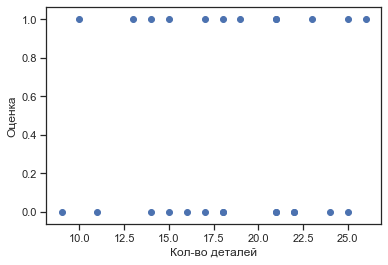

In [21]:
result_df.astype(float).loc[result_df.astype(float)["Оценка"]==0.0, "Оценка"]=0.0
result_df.astype(float).loc[result_df.astype(float)["Оценка"]==1.0, "Оценка"]=1.0
X = result_df.astype(float)["Кол-во деталей"].values.reshape(-1,1)
Y = result_df.astype(float)["Оценка"].values.reshape(-1,1)

LogR = LogisticRegression()
LogR.fit(X,np.ravel(Y.astype(float)))

#matplotlib scatter funcion w/ logistic regression
plt.scatter(X,Y)
plt.xlabel("Кол-во деталей")
plt.ylabel("Оценка")